In [63]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [133]:
def preprocess_eeg_debugging_data(fn, pkg_interval, ch="ch1",slize=None):
    df = pd.read_csv(fn, skiprows=2)
    if(slize): df = df[slize[0]:slize[1]]
    df[ch] = df[ch].subtract(df[ch].mean())
    df["f_time"] = df.index*pkg_interval
    df.set_index(df["time"])
    
    return df.iloc[50:2500]

def plot_eeg_debugging_data(fn,interval=6,ax=None, ylabel="[2.5mV]",
                            time="f_time",ch="ch1",slize=None,
                            params={"enc":True,
                                    "enc_f":True,
                                    "title":True,
                                    "legend":True,
                                    "normalize":True}):
    
    df = preprocess_eeg_debugging_data(fn,interval,ch=ch,slize=slize)
    
    if (ax==None):
        fig, ax = plt.subplots(1,1, figsize=(9,5))

    df[f"{ch}N"] = df[f"{ch}"]
    
    if(params["normalize"]):
        df[f"{ch}N"] /= df[f"{ch}N"].std()
        df.plot(y=f"{ch}N",x=time, ax=ax, label=f"{ch} normalized")
    else:
        df.plot(y=f"{ch}",x=time, ax=ax, label=f"{ch}")
        
    if params["enc"]: df.plot(y="enc_ch1", x=time, ax=ax, lw="2", label=f"Bitshift 1")
    if params["enc_f"]: df.plot(y="enc_flag", x=time, ax=ax, lw="2", label=f"Encoding Flag")

    if params["title"]: ax.set_title(fn)
    ax.set_xlabel("ms")
    ax.set_ylabel(ylabel)
    if params["legend"]: ax.legend()
    plt.savefig("08-03-2021_13-55-38_tr6_5hz_4mvolt_ch1_gain8.png")
    

### ```87 Hz, 5mV, 5Hz, 120s```

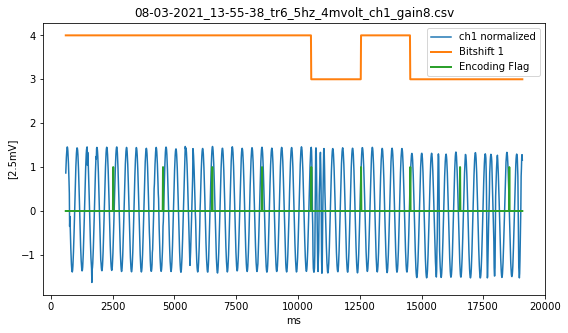

In [134]:
plot_eeg_debugging_data(fn= "08-03-2021_13-55-38_tr6_5hz_4mvolt_ch1_gain8.csv", interval = 12)

### ```167Hz, 5mV, 5Hz, 120s```

<IPython.core.display.Javascript object>


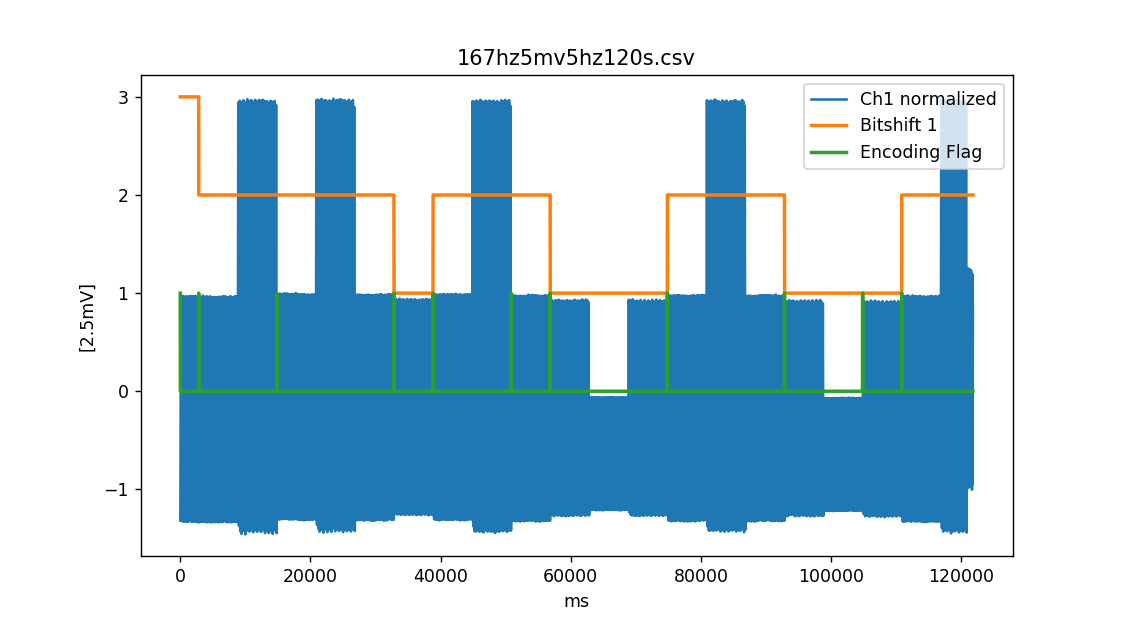

In [31]:
plot_eeg_debugging_data(fn= "167hz5mv5hz120s.csv", interval = 6)

### ```167 Hz, 4mV, 5Hz, 120s```

<IPython.core.display.Javascript object>


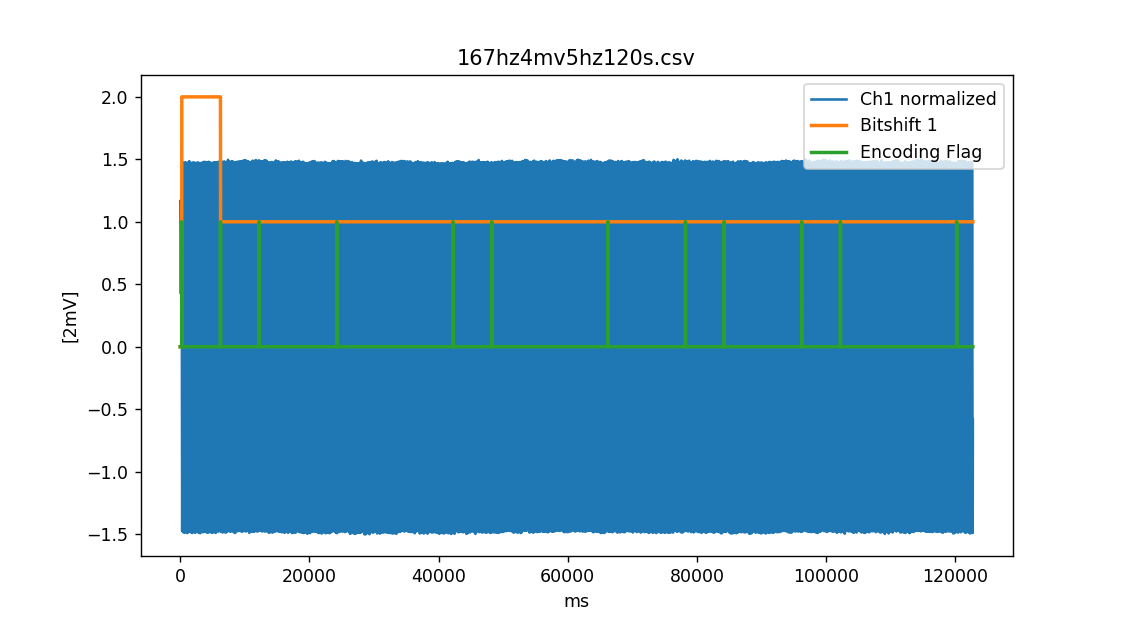

In [32]:
plot_eeg_debugging_data(fn= "167hz4mv5hz120s.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4.8mV, 5Hz, 120s```

In [ ]:
plot_eeg_debugging_data(fn= "167hz4_8mv5hz120s.csv", interval = 6, ylabel="[2.4mV]")

### ```167 Hz, 4.4mV, 5Hz, 120s```

In [ ]:
plot_eeg_debugging_data(fn= "167hz4_4mv5hz120s.csv", interval = 6, ylabel="[2.2mV]")

### ```167 Hz, 4mV, 5Hz, 120s, 2nd Recording```

In [ ]:
plot_eeg_debugging_data(fn= "167hz4mv5hz120sR2.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4mV, Frequencies:[20Hz,15Hz,10Hz,5Hz] Changer after 30s, 120s```

In [ ]:
plot_eeg_debugging_data(fn= "167hz4mvmixed120s.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4mV, Frequencies:[20Hz,15Hz,10Hz,5Hz] Changer after 30s, 120s```

<IPython.core.display.Javascript object>


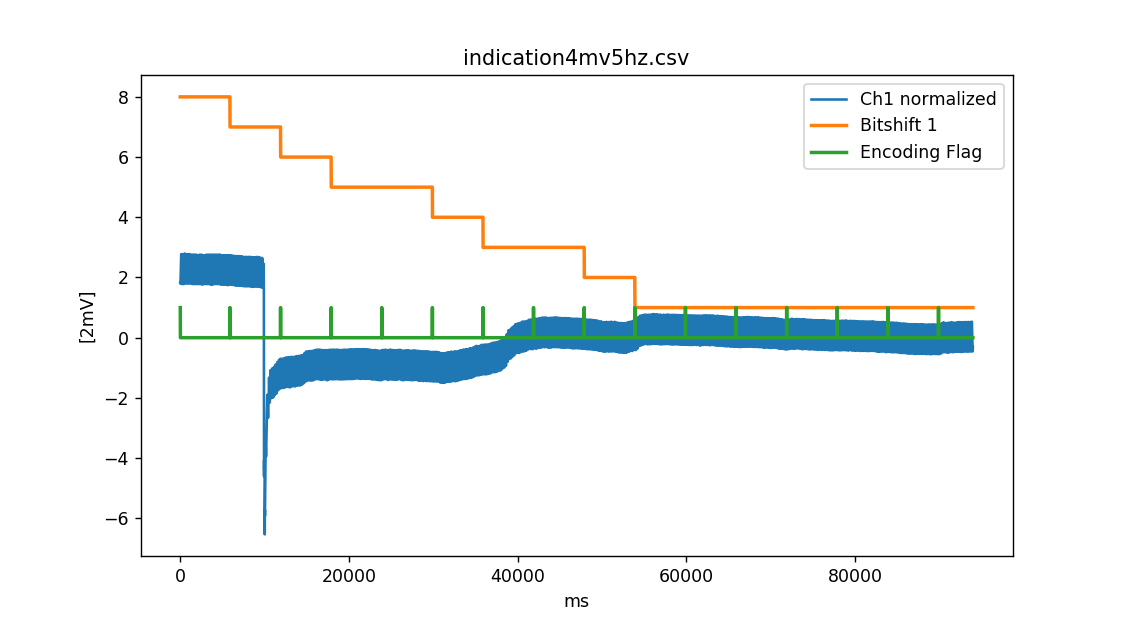

In [5]:
plot_eeg_debugging_data(fn= "indication4mv5hz.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4mV, Frequencies:[20Hz,15Hz,10Hz,5Hz] Changer after 30s, 120s```

<IPython.core.display.Javascript object>


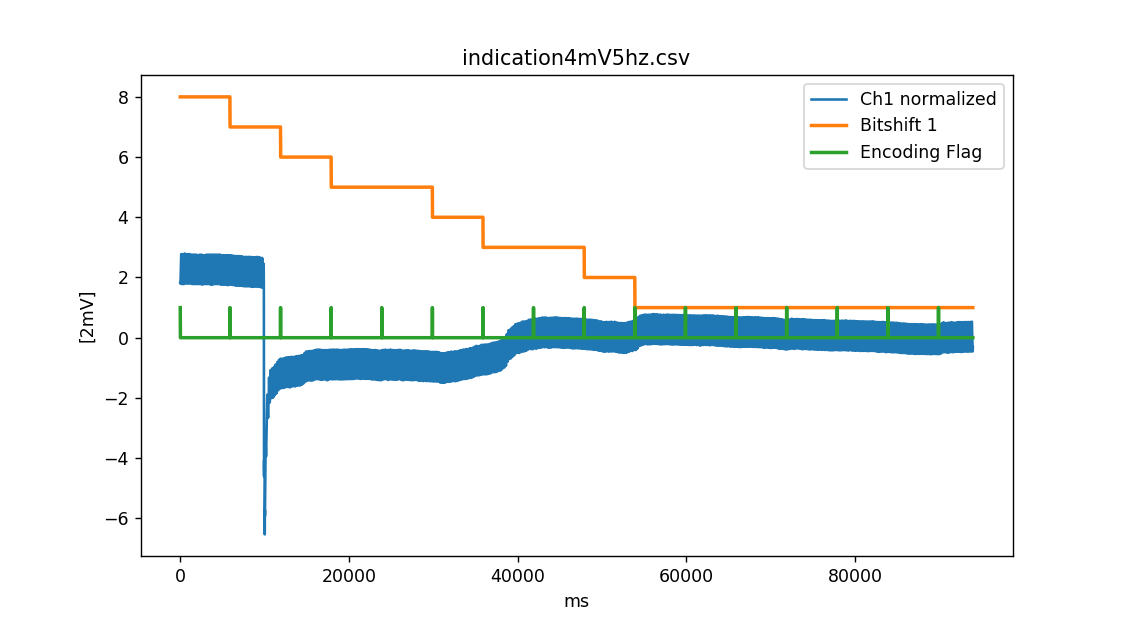

In [6]:
plot_eeg_debugging_data(fn= "indication4mV5hz.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4mV, 4Hz, Indications, Each Channel 5s, 390s, January 25th 2021```

<IPython.core.display.Javascript object>


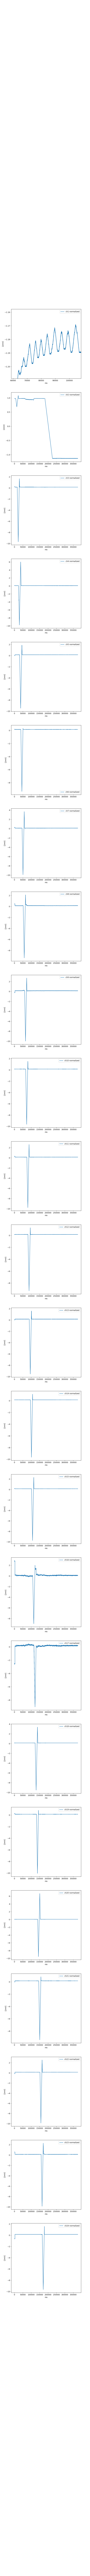

In [3]:
fig, axes = plt.subplots(24,figsize=(7,200))
for i,axis in enumerate(axes):
    channel = f"ch{i+1}"
    
    plot_eeg_debugging_data(fn= "4mv4hz390s_5s_each.csv",
                            interval = 6,
                            ylabel="[2mV]",
                            ax=axis,
                            ch=channel,
                            params={"enc":False,"enc_f":False,"title":False,"legend":False}
                           )
    

### ```167 Hz, 4mV, 4Hz, Notifications, Each Channel 10s,  January 29th 2021```

<IPython.core.display.Javascript object>


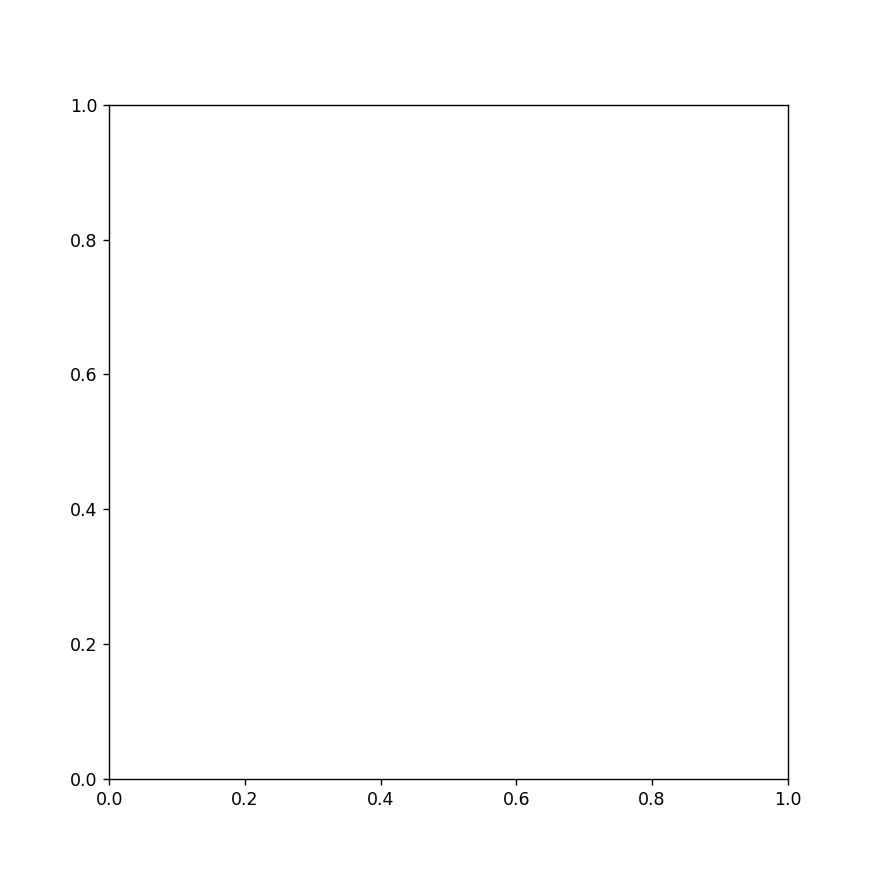

TypeError: 'AxesSubplot' object is not iterable

In [47]:
fig, axes = plt.subplots(1,figsize=(7,7))
for i,axis in enumerate(axes):
    channel = f"ch{i+1}"
    
    plot_eeg_debugging_data(fn= "4-4-10s-all.csv",
                            interval = 6,
                            ylabel="[2mV]",
                            ax=axis,
                            ch=channel,
                            params={"enc":False,"enc_f":False,"title":False,"legend":False}
                           )
    

### ```167 Hz, 4mV, 5Hz, Indications, Each Channel 10s,  February 1st 2021```

<IPython.core.display.Javascript object>


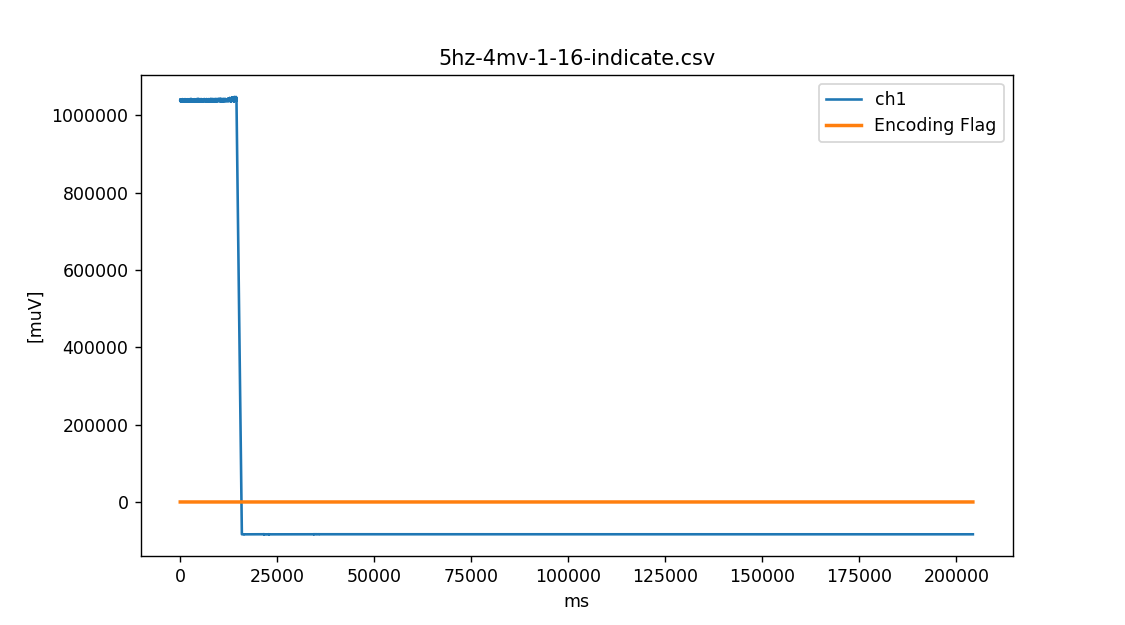

In [42]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 1

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":True,"title":True,"legend":False,"normalize":False}
                       )

<IPython.core.display.Javascript object>


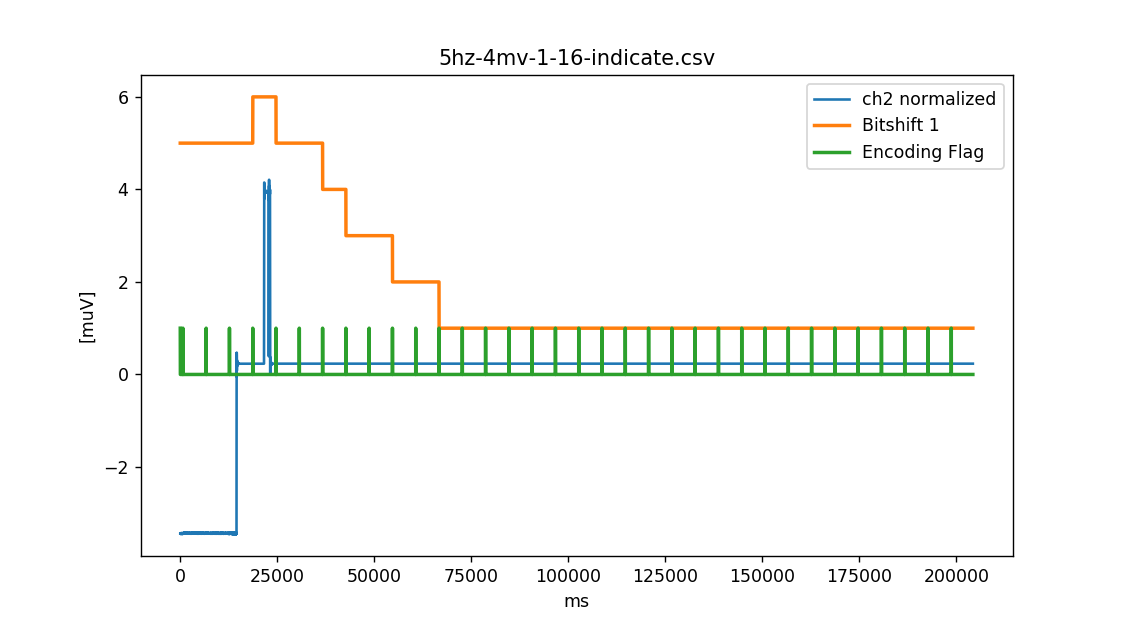

In [43]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 2

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":True,"enc_f":True,"title":True,"legend":False,"normalize":True}
                       )

<IPython.core.display.Javascript object>


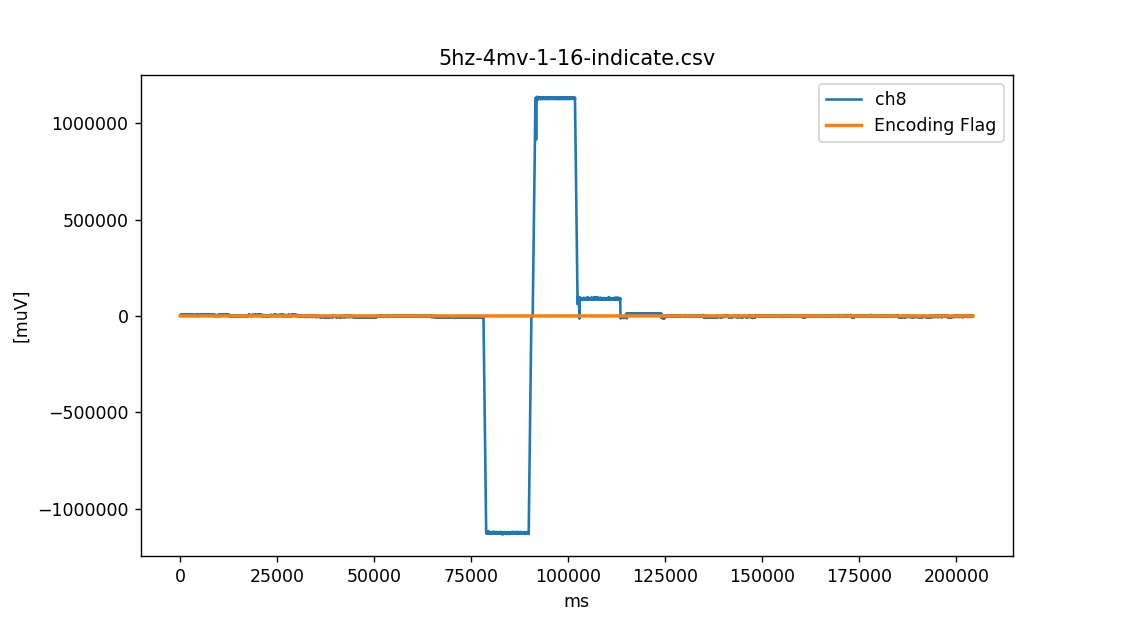

In [44]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 8

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":True,"title":True,"legend":False,"normalize":False}
                       )

<IPython.core.display.Javascript object>


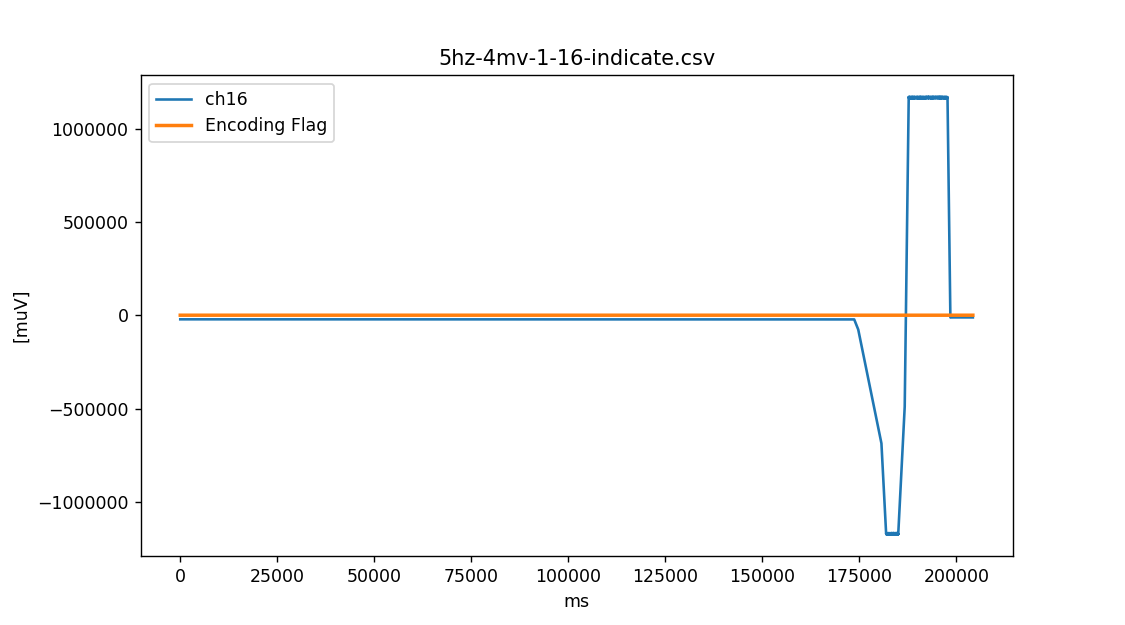

In [25]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 16

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":True,"title":True,"legend":False,"normalize":False}
                       )

<IPython.core.display.Javascript object>


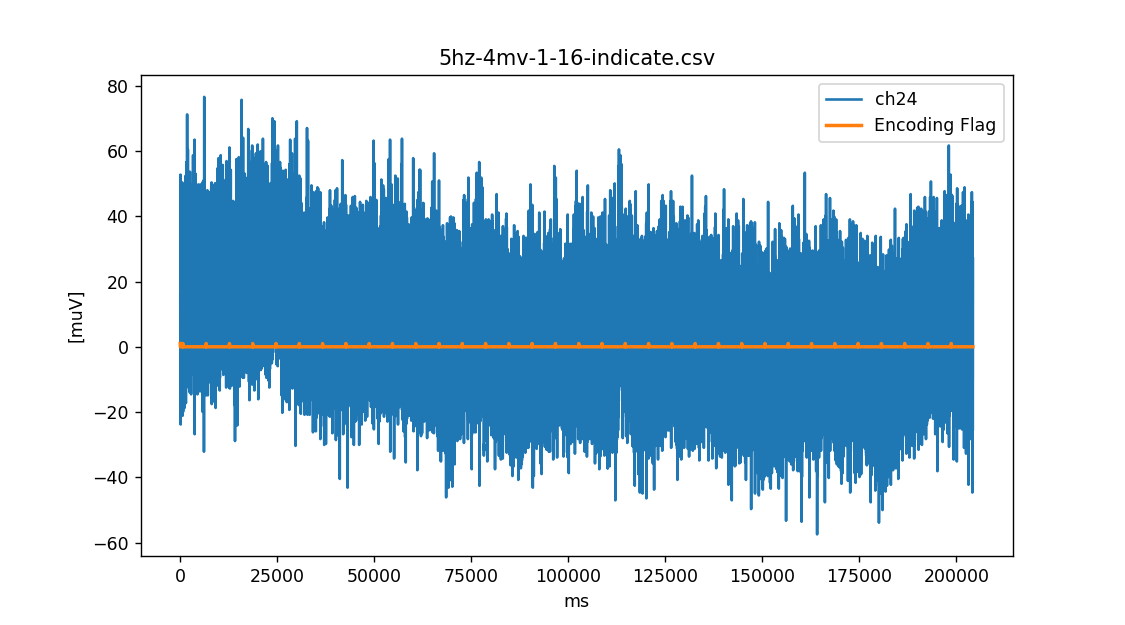

In [26]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 24

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":True,"title":True,"legend":False,"normalize":False}
                       )

### ```167 Hz, [3-5]mV, [4-20]Hz, Indications, Channel 1 Long Term ,  February 1st 2021```

<IPython.core.display.Javascript object>


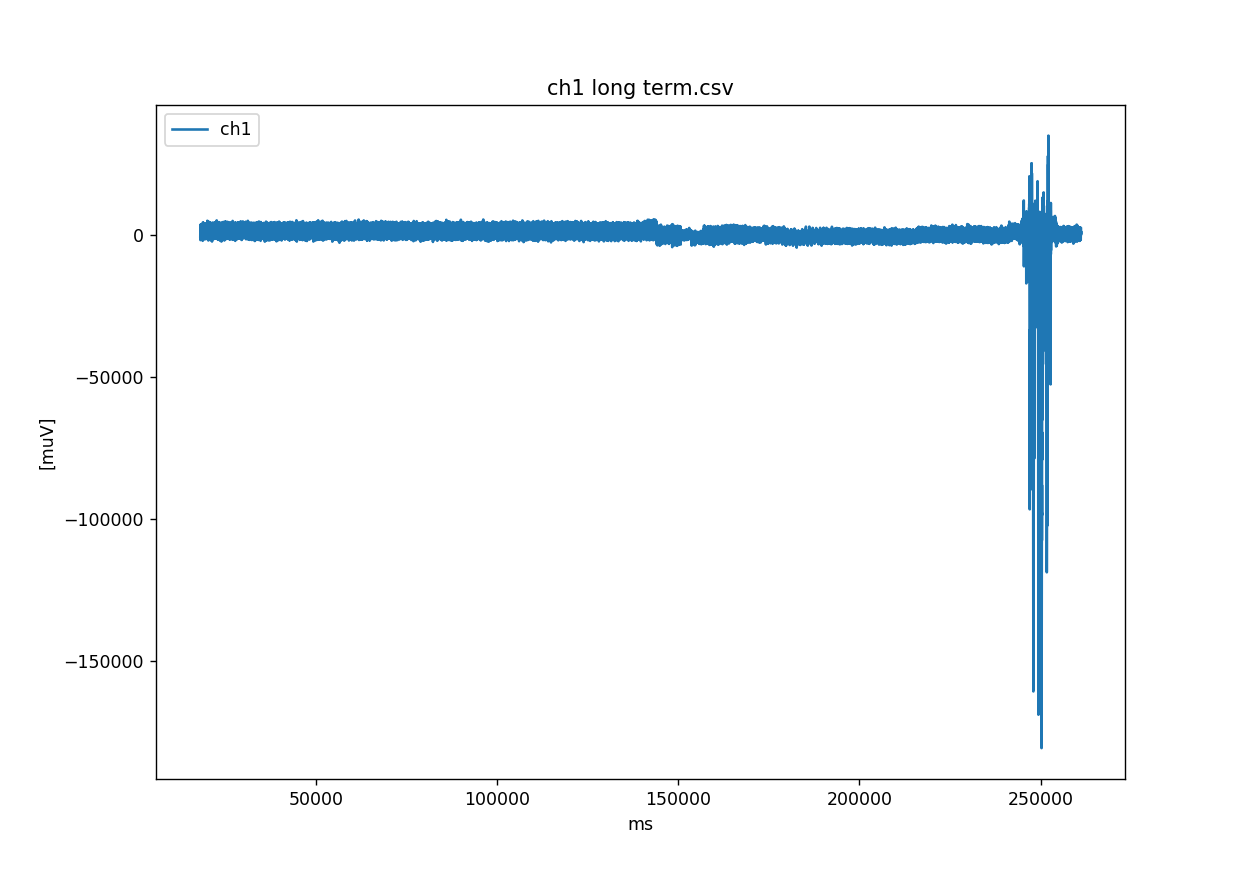

In [46]:
fig, ax = plt.subplots(1,figsize=(10,7))
chN = 1

plot_eeg_debugging_data(fn= "ch1 long term.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":False,"title":True,"legend":True,"normalize":False},
                        slize=[3000,-1])

### ```167 Hz, 4mV, 5Hz, Indications, Channel 1 Long Term 2,  February 1st 2021```

<IPython.core.display.Javascript object>


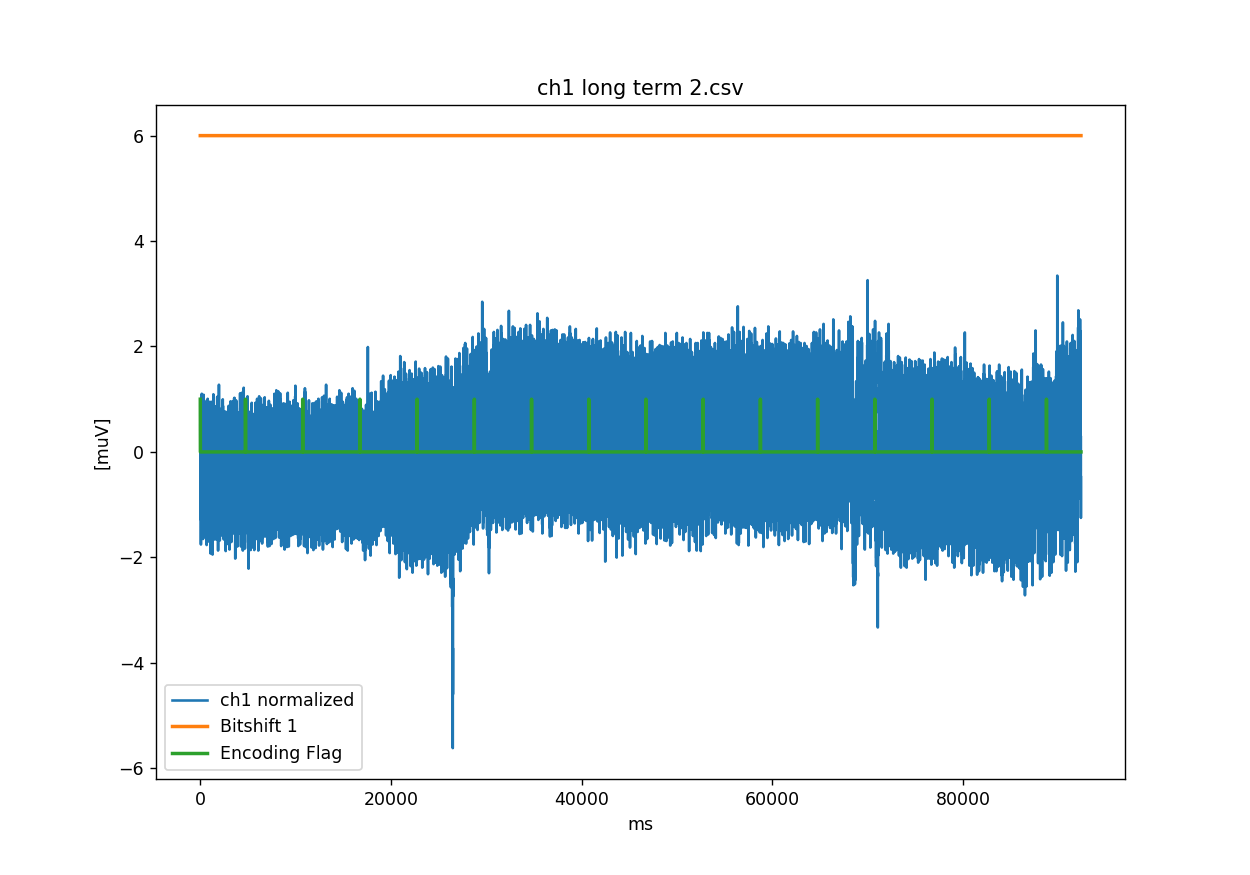

In [41]:
fig, ax = plt.subplots(1,figsize=(10,7))
chN = 1

plot_eeg_debugging_data(fn= "ch1 long term 2.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":True,"enc_f":True,"title":True,"legend":True,"normalize":True},
                        slize=[0,-1])

<IPython.core.display.Javascript object>


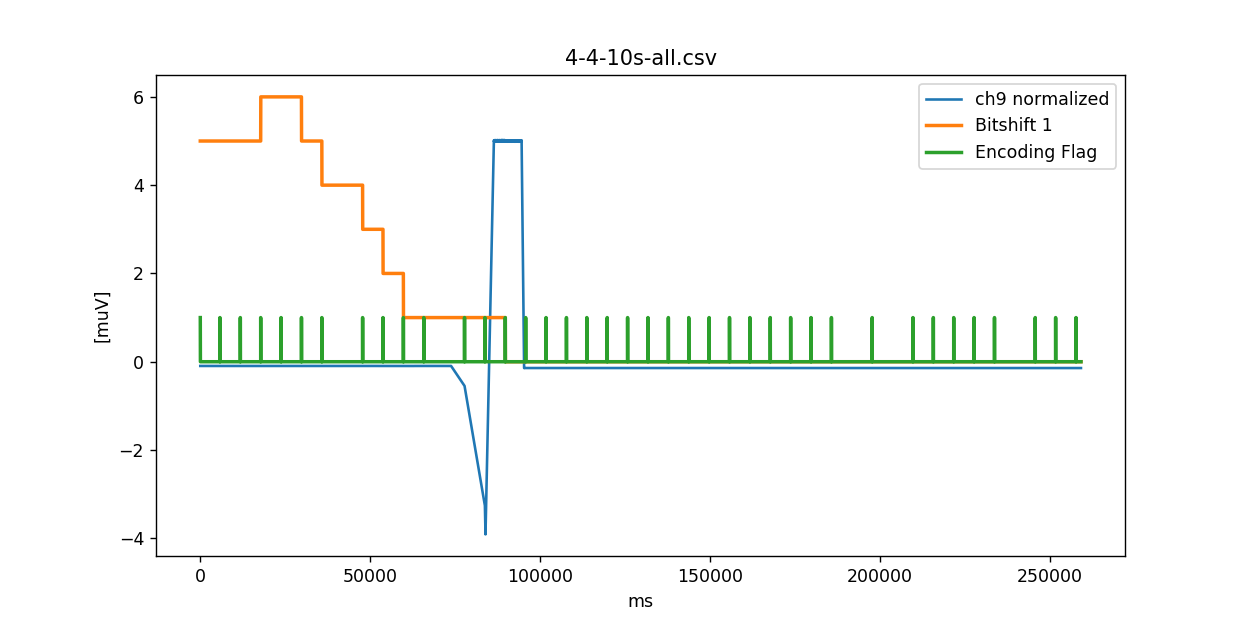

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
plot_eeg_debugging_data(fn= "4-4-10s-all.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch="ch9",
                        params={"enc":True,"enc_f":True,"title":True,"legend":False,"normalize":True}
                       )
    

In [19]:
def pkg_loss(df, start,end, notify_interval=6):
    '''
    Calculates Pkg loss in a given interval based on the expected 
    number of packages minus actual number of packages
    '''
    pkg_delta = end-start 
    t_int = df.time[end] - df.time[start]
    exp_pkg = int(t_int/notify_interval)

    missing = exp_pkg - pkg_delta
    print(f"==\n Expected {exp_pkg}, Received {pkg_delta}, Delta {missing} \n==")
    return exp_pkg,pkg_delta,missing

In [20]:
fn = "83hz5mv5hz120s.csv"
df = preprocess_eeg_debugging_data(fn, 12)
a = pkg_loss(df,0,df.shape[0]-1,12)

==
 Expected 10034, Received 10034, Delta 0 
==


In [29]:
fn = "167hz5mv5hz120s.csv"
df = preprocess_eeg_debugging_data(fn, 6)
a = pkg_loss(df,0,df.shape[0]-599,6)

==
 Expected 19697, Received 19697, Delta 0 
==


In [18]:
import math
def max_amp(bits):
    return 2**(bits-1)*0.298
def req_bits(amp):
    return (math.log(2*amp/0.298,2))

pd.Series([max_amp(i) for i in range(24)])

0           0.149
1           0.298
2           0.596
3           1.192
4           2.384
5           4.768
6           9.536
7          19.072
8          38.144
9          76.288
10        152.576
11        305.152
12        610.304
13       1220.608
14       2441.216
15       4882.432
16       9764.864
17      19529.728
18      39059.456
19      78118.912
20     156237.824
21     312475.648
22     624951.296
23    1249902.592
dtype: float64